In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Big Profit Players in world.csv")

In [3]:
df

,Rank,Company,Stock Symbol,earnings TTM (USD) in Billion,Share price (USD),Company origin
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.99221,Saudi Arabia
1,2,Petrobras,PBR,1.573860e+11,17.01000,Brazil
2,3,Berkshire Hathaway,BRK-B,1.251690e+11,406.14000,United States
3,4,Apple,AAPL,1.214160e+11,182.40000,United States
4,5,Microsoft,MSFT,1.052640e+11,409.34000,United States
...,...,...,...,...,...,...
8390,8391,SK Hynix,000660.KS,-9.950610e+09,132.14100,South Korea
8391,8392,Lumen,LUMN,-1.081500e+10,1.30000,United States
8392,8393,Walgreens Boots Alliance,WBA,-1.366400e+10,17.35000,United States
8393,8394,Veolia,VIE.PA,-1.438240e+10,32.27540,France


In [4]:
#prediksi harga saham
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           8395 non-null   int64  
 1   Company                        8395 non-null   object 
 2   Stock Symbol                   8394 non-null   object 
 3   earnings TTM (USD) in Billion  8395 non-null   float64
 4   Share price (USD)              8395 non-null   float64
 5   Company origin                 8393 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 393.6+ KB
None
              Rank  earnings TTM (USD) in Billion  Share price (USD)
count  8395.000000                   8.395000e+03        8395.000000
mean   4198.000000                   8.382819e+08          69.600700
std    2423.572088                   4.930298e+09         388.730536
min       1.000000                  -1.669200e+10           0.000000


In [6]:
print(df.duplicated().sum())
print("Jumlah duplikat:", df.duplicated().sum())

0
Jumlah duplikat: 0


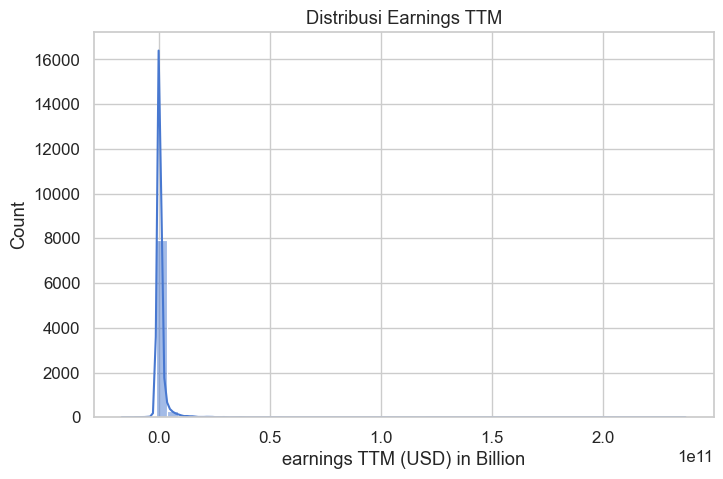

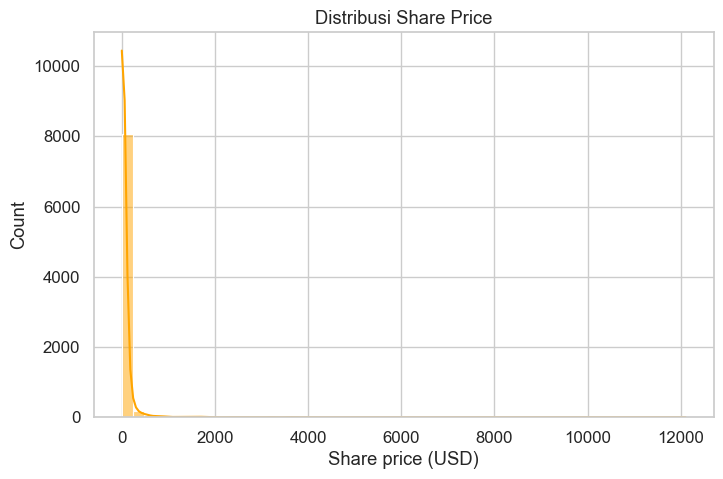

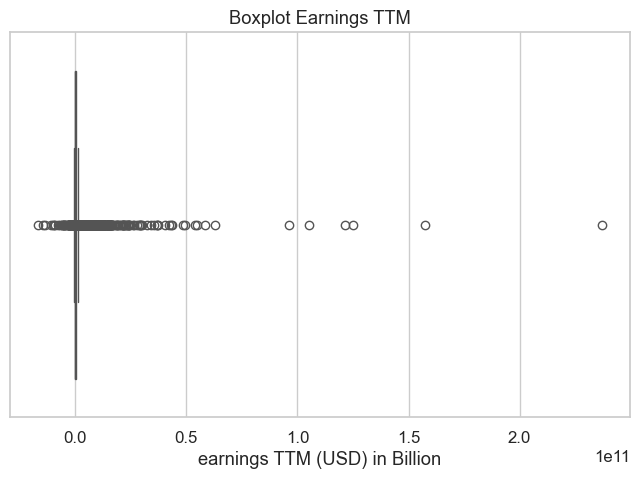

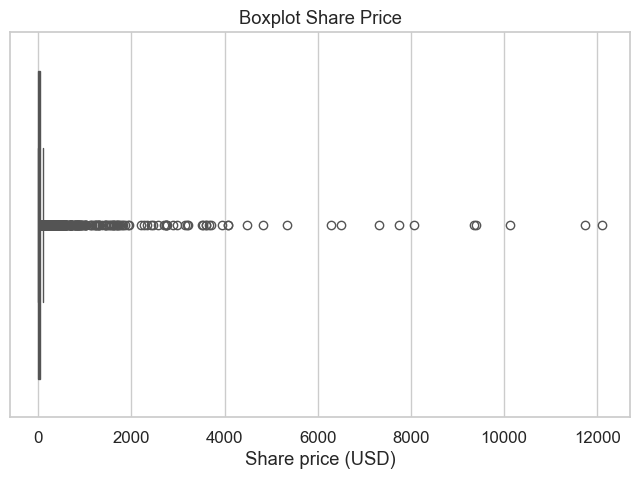

In [7]:
# Distribusi earnings TTM
plt.figure(figsize=(8, 5))
sns.histplot(df['earnings TTM (USD) in Billion'], bins=50, kde=True)
plt.title('Distribusi Earnings TTM')
plt.show()

# Distribusi share price
plt.figure(figsize=(8, 5))
sns.histplot(df['Share price (USD)'], bins=50, kde=True, color='orange')
plt.title('Distribusi Share Price')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['earnings TTM (USD) in Billion'])
plt.title('Boxplot Earnings TTM')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Share price (USD)'])
plt.title('Boxplot Share Price')
plt.show()

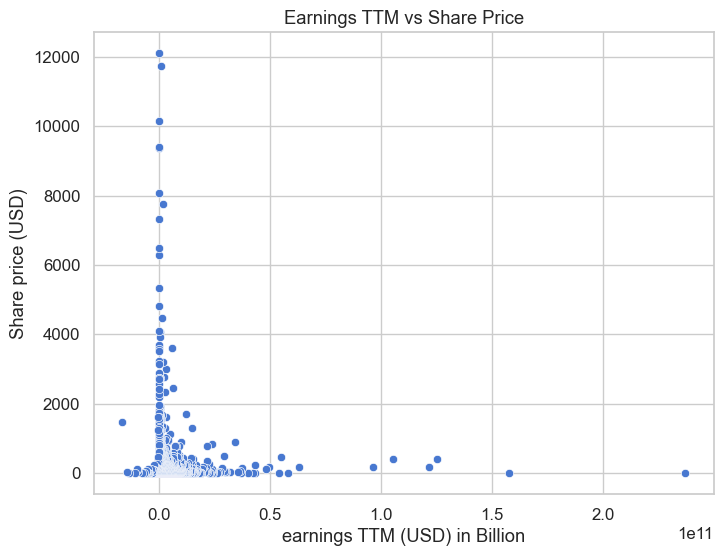

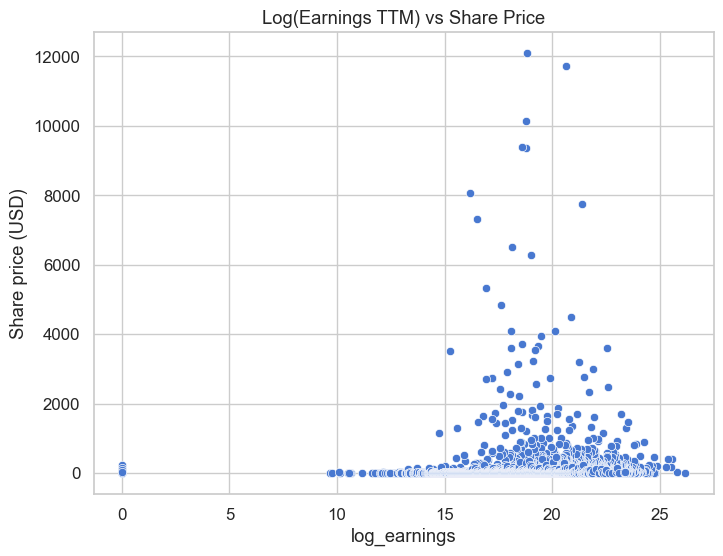

In [8]:
# Scatter plot earnings vs share price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='earnings TTM (USD) in Billion', y='Share price (USD)', data=df)
plt.title('Earnings TTM vs Share Price')
plt.show()

# Jika earnings TTM banyak negatif / skewed, coba plot log(earnings)
df['log_earnings'] = np.log1p(df['earnings TTM (USD) in Billion'].abs())  # log1p untuk menghindari log(0)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_earnings', y='Share price (USD)', data=df)
plt.title('Log(Earnings TTM) vs Share Price')
plt.show()

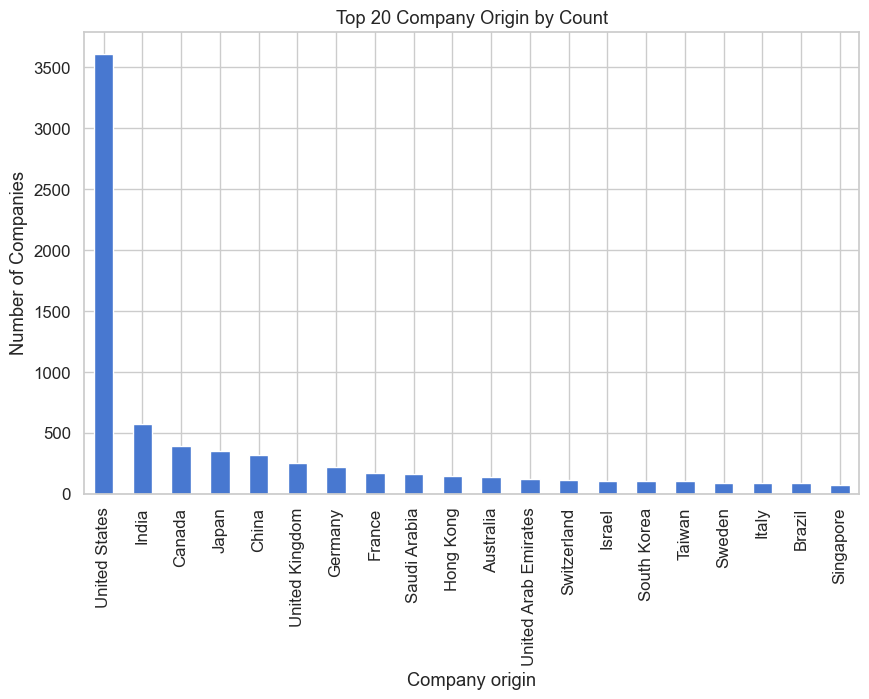

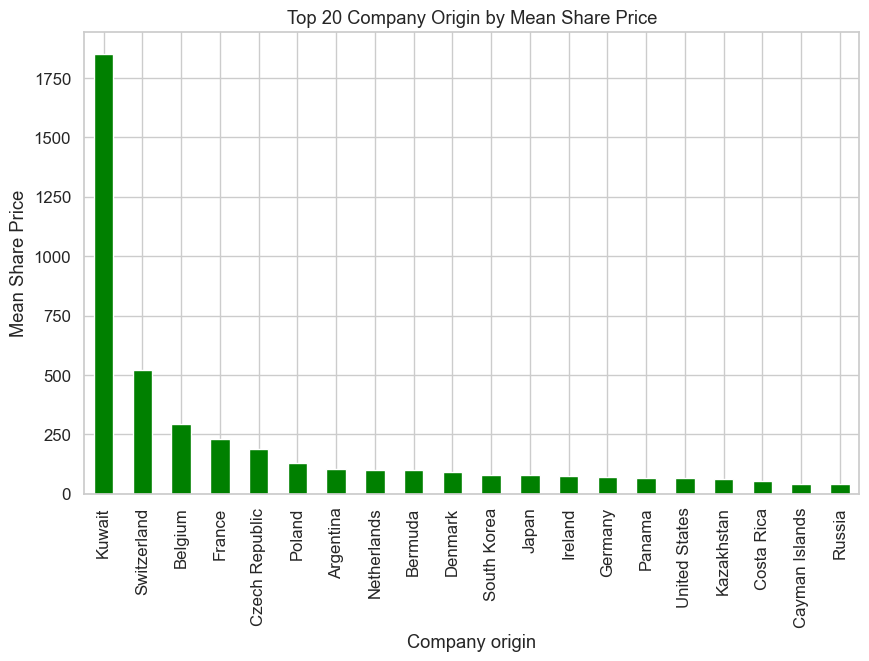

In [9]:
# Banyaknya perusahaan per negara
plt.figure(figsize=(10, 6))
df['Company origin'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Company Origin by Count')
plt.ylabel('Number of Companies')
plt.show()

# Rata-rata share price per negara
plt.figure(figsize=(10, 6))
country_mean = df.groupby('Company origin')['Share price (USD)'].mean().sort_values(ascending=False).head(20)
country_mean.plot(kind='bar', color='green')
plt.title('Top 20 Company Origin by Mean Share Price')
plt.ylabel('Mean Share Price')
plt.show()

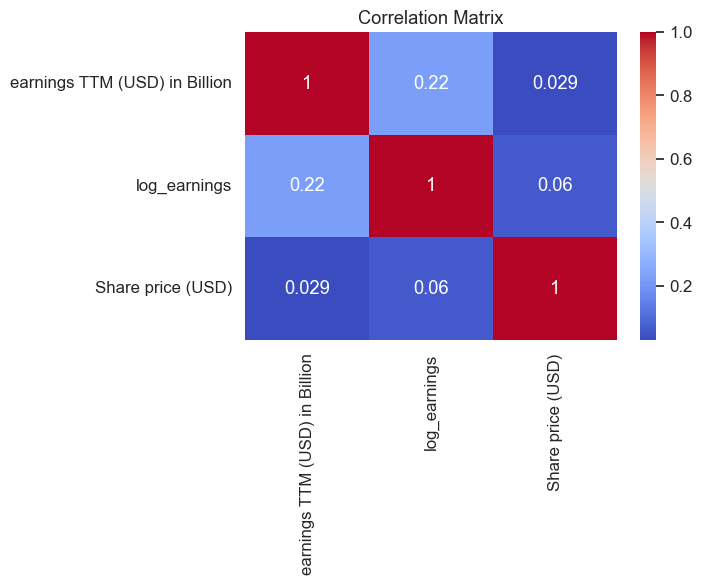

In [10]:
# Korelasi matrix
corr = df[['earnings TTM (USD) in Billion', 'log_earnings', 'Share price (USD)']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
print("\n=== Earnings TTM - Statistik deskriptif ===")
print(df['earnings TTM (USD) in Billion'].describe())

print("\n=== Share price - Statistik deskriptif ===")
print(df['Share price (USD)'].describe())

# Skewness & kurtosis
print("\n=== Skewness & Kurtosis ===")
print(f"Earnings TTM skewness: {df['earnings TTM (USD) in Billion'].skew():.2f}")
print(f"Share price skewness: {df['Share price (USD)'].skew():.2f}")
print(f"Earnings TTM kurtosis: {df['earnings TTM (USD) in Billion'].kurt():.2f}")
print(f"Share price kurtosis: {df['Share price (USD)'].kurt():.2f}")

df['log_earnings'] = np.log1p(df['earnings TTM (USD) in Billion'].abs())

print("\n=== Korelasi numerik ===")
corr = df[['earnings TTM (USD) in Billion', 'log_earnings', 'Share price (USD)']].corr()
print(corr)


=== Earnings TTM - Statistik deskriptif ===
count    8.395000e+03
mean     8.382819e+08
std      4.930298e+09
min     -1.669200e+10
25%     -6.383000e+06
50%      7.825890e+07
75%      4.697995e+08
max      2.369640e+11
Name: earnings TTM (USD) in Billion, dtype: float64

=== Share price - Statistik deskriptif ===
count     8395.000000
mean        69.600700
std        388.730536
min          0.000000
25%          2.935000
50%         12.630000
75%         40.297650
max      12100.000000
Name: Share price (USD), dtype: float64

=== Skewness & Kurtosis ===
Earnings TTM skewness: 24.57
Share price skewness: 18.37
Earnings TTM kurtosis: 894.00
Share price kurtosis: 428.50

=== Korelasi numerik ===
                               earnings TTM (USD) in Billion  log_earnings  \
earnings TTM (USD) in Billion                       1.000000      0.224411   
log_earnings                                        0.224411      1.000000   
Share price (USD)                                   0.028922  

In [12]:
print("\n=== Top 10 Company origin by jumlah perusahaan ===")
print(df['Company origin'].value_counts().head(10))

print("\n=== Top 10 rata-rata share price per negara ===")
print(df.groupby('Company origin')['Share price (USD)'].mean().sort_values(ascending=False).head(10))

print("\n=== Insight cepat ===")
if df['earnings TTM (USD) in Billion'].skew() > 1 or df['earnings TTM (USD) in Billion'].skew() < -1:
    print("- Earnings TTM sangat skewed, pertimbangkan log transform.")
else:
    print("- Earnings TTM distribusinya relatif normal.")

if df['Share price (USD)'].skew() > 1 or df['Share price (USD)'].skew() < -1:
    print("- Share price sangat skewed, pertimbangkan scaling atau transform.")
else:
    print("- Share price distribusinya relatif normal.")

print("- Korelasi earnings TTM dengan share price:", f"{corr.loc['earnings TTM (USD) in Billion', 'Share price (USD)']:.2f}")
print("- Korelasi log_earnings dengan share price:", f"{corr.loc['log_earnings', 'Share price (USD)']:.2f}")

print("- Negara dengan rata-rata harga saham tertinggi:", df.groupby('Company origin')['Share price (USD)'].mean().idxmax())


=== Top 10 Company origin by jumlah perusahaan ===
Company origin
United States     3615
India              570
Canada             391
Japan              346
China              313
United Kingdom     253
Germany            220
France             166
Saudi Arabia       163
Hong Kong          147
Name: count, dtype: int64

=== Top 10 rata-rata share price per negara ===
Company origin
Kuwait            1852.600055
Switzerland        519.923165
Belgium            292.309992
France             232.058949
Czech Republic     188.721965
Poland             128.348989
Argentina          104.562505
Netherlands        101.450091
Bermuda             99.085701
Denmark             91.335839
Name: Share price (USD), dtype: float64

=== Insight cepat ===
- Earnings TTM sangat skewed, pertimbangkan log transform.
- Share price sangat skewed, pertimbangkan scaling atau transform.
- Korelasi earnings TTM dengan share price: 0.03
- Korelasi log_earnings dengan share price: 0.06
- Negara dengan rata-rata 

In [13]:
def detect_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [14]:
# Earnings TTM
earnings_lower, earnings_upper = detect_outlier_bounds(df['earnings TTM (USD) in Billion'])
print(f"Earnings TTM lower: {earnings_lower:.2e}, upper: {earnings_upper:.2e}")

# Share price
price_lower, price_upper = detect_outlier_bounds(df['Share price (USD)'])
print(f"Share price lower: {price_lower:.2f}, upper: {price_upper:.2f}")

Earnings TTM lower: -7.21e+08, upper: 1.18e+09
Share price lower: -53.11, upper: 96.34


In [15]:
df['earnings_ttm_winsor'] = np.where(
    df['earnings TTM (USD) in Billion'] < earnings_lower, earnings_lower,
    np.where(df['earnings TTM (USD) in Billion'] > earnings_upper, earnings_upper,
             df['earnings TTM (USD) in Billion'])
)

In [16]:
df['share_price_winsor'] = np.where(
    df['Share price (USD)'] > price_upper, price_upper,
    df['Share price (USD)']
)

In [17]:
df['log_earnings_ttm'] = np.log1p(df['earnings_ttm_winsor'].abs())
df['log_share_price'] = np.log1p(df['share_price_winsor'])

In [18]:
print("\n=== Statistik earnings_ttm_winsor ===")
print(df['earnings_ttm_winsor'].describe())

print("\n=== Statistik share_price_winsor ===")
print(df['share_price_winsor'].describe())

print("\n=== Statistik log transform ===")
print(df[['log_earnings_ttm', 'log_share_price']].describe())


=== Statistik earnings_ttm_winsor ===
count    8.395000e+03
mean     2.684793e+08
std      4.655217e+08
min     -7.206568e+08
25%     -6.383000e+06
50%      7.825890e+07
75%      4.697995e+08
max      1.184073e+09
Name: earnings_ttm_winsor, dtype: float64

=== Statistik share_price_winsor ===
count    8395.000000
mean       27.498807
std        32.372990
min         0.000000
25%         2.935000
50%        12.630000
75%        40.297650
max        96.341625
Name: share_price_winsor, dtype: float64

=== Statistik log transform ===
       log_earnings_ttm  log_share_price
count       8395.000000      8395.000000
mean          18.245497         2.550159
std            3.186754         1.389904
min            0.000000         0.000000
25%           17.381334         1.369910
50%           18.750258         2.612273
75%           20.114576         3.720806
max           20.892226         4.578227


In [19]:
df

,Rank,Company,Stock Symbol,earnings TTM (USD) in Billion,Share price (USD),Company origin,log_earnings,earnings_ttm_winsor,share_price_winsor,log_earnings_ttm,log_share_price
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.99221,Saudi Arabia,26.191174,1.184073e+09,7.992210,20.892226,2.196359
1,2,Petrobras,PBR,1.573860e+11,17.01000,Brazil,25.781967,1.184073e+09,17.010000,20.892226,2.890927
2,3,Berkshire Hathaway,BRK-B,1.251690e+11,406.14000,United States,25.552931,1.184073e+09,96.341625,20.892226,4.578227
3,4,Apple,AAPL,1.214160e+11,182.40000,United States,25.522489,1.184073e+09,96.341625,20.892226,4.578227
4,5,Microsoft,MSFT,1.052640e+11,409.34000,United States,25.379737,1.184073e+09,96.341625,20.892226,4.578227
...,...,...,...,...,...,...,...,...,...,...,...
8390,8391,SK Hynix,000660.KS,-9.950610e+09,132.14100,South Korea,23.020900,-7.206568e+08,96.341625,20.395674,4.578227
8391,8392,Lumen,LUMN,-1.081500e+10,1.30000,United States,23.104200,-7.206568e+08,1.300000,20.395674,0.832909
8392,8393,Walgreens Boots Alliance,WBA,-1.366400e+10,17.35000,United States,23.338030,-7.206568e+08,17.350000,20.395674,2.909630
8393,8394,Veolia,VIE.PA,-1.438240e+10,32.27540,France,23.389271,-7.206568e+08,32.275400,20.395674,3.504818


In [20]:
print("\n=== Statistik share price ===")
print(df['share_price_winsor'].describe())

print("\n=== Quantiles share price ===")
print(df['share_price_winsor'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


=== Statistik share price ===
count    8395.000000
mean       27.498807
std        32.372990
min         0.000000
25%         2.935000
50%        12.630000
75%        40.297650
max        96.341625
Name: share_price_winsor, dtype: float64

=== Quantiles share price ===
0.01     0.035980
0.05     0.337437
0.10     0.784520
0.25     2.935000
0.50    12.630000
0.75    40.297650
0.90    96.341625
0.95    96.341625
0.99    96.341625
Name: share_price_winsor, dtype: float64


In [21]:
median_price = df['share_price_winsor'].median()

low_count = (df['share_price_winsor'] <= median_price).sum()
high_count = (df['share_price_winsor'] > median_price).sum()

print(f"\nJumlah data <= median price ({median_price}): {low_count}")
print(f"Jumlah data > median price: {high_count}")


Jumlah data <= median price (12.63): 4199
Jumlah data > median price: 4196


In [22]:
df['price_bin'] = pd.qcut(df['share_price_winsor'], q=3, labels=['low', 'medium', 'high'])

print("\n=== Distribusi price_bin ===")
print(df['price_bin'].value_counts())


=== Distribusi price_bin ===
price_bin
high      2799
low       2798
medium    2798
Name: count, dtype: int64


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [24]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): 
        self.median_name_length_ = X['Company'].apply(lambda x: len(str(x))).median()
        self.top_5_countries_ = X['Company origin'].value_counts().head(5).index.tolist()
        return self
    
    def transform(self, X):
        X_ = X.copy()
        X_['abs_earnings'] = X_['earnings TTM (USD) in Billion'].abs()
        X_['is_loss'] = (X_['earnings TTM (USD) in Billion'] < 0).astype(int)
        X_['earnings_per_rank'] = X_['earnings TTM (USD) in Billion'] / (X_['Rank'] + 1)
        X_['is_high_rank'] = (X_['Rank'] <= X_['Rank'].quantile(0.1)).astype(int)
        X_['log_rank'] = np.log1p(X_['Rank'])
        X_['company_name_length'] = X_['Company'].apply(lambda x: len(str(x)))
        X_['log_abs_earnings'] = np.log1p(X_['abs_earnings'])
        X_['abs_earnings_per_rank'] = X_['abs_earnings'] / (X_['Rank'] + 1)
        X_['log_earnings_per_rank'] = np.log1p(np.abs(X_['earnings_per_rank']))
        X_['is_large_company_name'] = (X_['company_name_length'] > self.median_name_length_).astype(int)
        X_['company_name_vowel_ratio'] = X_['Company'].apply(
            lambda name: sum(1 for c in str(name).lower() if c in 'aeiou') / (len(str(name))+1e-6)
        )
        X_['company_name_has_number'] = X_['Company'].apply(
            lambda name: any(char.isdigit() for char in str(name))
        ).astype(int)
        X_['is_usa'] = (X_['Company origin'] == 'United States').astype(int)
        X_['is_top_5_country'] = X_['Company origin'].apply(lambda x: int(x in self.top_5_countries_))

        return X_

In [25]:
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower, upper): self.lower = lower; self.upper = upper
    def fit(self, X, y=None): return self
    def transform(self, X): return np.clip(X, self.lower, self.upper)

In [26]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X): return np.log1p(np.abs(X))

In [27]:
numeric_features = [
    'earnings TTM (USD) in Billion',
    'abs_earnings',
    'is_loss',
    'earnings_per_rank',
    'log_rank',
    'company_name_length',
    'log_abs_earnings',
    'abs_earnings_per_rank',
    'log_earnings_per_rank',
    'is_large_company_name',
    'company_name_vowel_ratio',
    'company_name_has_number',
    'is_usa',
    'is_top_5_country',
    'is_high_rank'
]
categorical_features = ['Company origin', 'Stock Symbol']

In [28]:
earnings_lower, earnings_upper = -7.21e+08, 1.18e+09

In [29]:
earnings_pipeline = Pipeline([
    ('winsor', Winsorizer(earnings_lower, earnings_upper)),
    ('log', LogTransformer()),
    ('scaler', StandardScaler())
])

In [30]:
abs_earnings_pipeline = Pipeline([
    ('log', LogTransformer()),
    ('scaler', StandardScaler())
])

In [31]:
simple_scaler = Pipeline([
    ('scaler', StandardScaler())
])

In [32]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
preprocessor = ColumnTransformer([
    ('earnings', earnings_pipeline, ['earnings TTM (USD) in Billion']),
    ('abs_earnings', abs_earnings_pipeline, ['abs_earnings']),
    ('simple', simple_scaler, [
        'is_loss', 'earnings_per_rank', 'log_rank', 'company_name_length',
        'log_abs_earnings', 'abs_earnings_per_rank', 'log_earnings_per_rank',
        'is_large_company_name', 'company_name_vowel_ratio',
        'company_name_has_number', 'is_usa', 'is_top_5_country', 'is_high_rank'
    ]),
    ('categorical', categorical_pipeline, categorical_features)
])

In [34]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(
        random_state=42, n_estimators=50,
        max_depth=5, min_samples_leaf=10, n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        random_state=42, n_estimators=50,
        max_depth=5, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_alpha=0.5, reg_lambda=0.5,
        verbosity=0, n_jobs=-1
    )
}

In [35]:
X = df.copy()
y = df['share_price_winsor'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Pipeline
    pipe = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")


=== LinearRegression ===
MAE : 20.7506
RMSE: 26.7064
R²  : 0.3064

=== RandomForest ===
MAE : 18.4150
RMSE: 25.1879
R²  : 0.3830

=== XGBoost ===
MAE : 17.4454
RMSE: 23.7234
R²  : 0.4527


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [39]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): 
        self.median_name_length_ = X['Company'].apply(lambda x: len(str(x))).median()
        self.top_5_countries_ = X['Company origin'].value_counts().head(5).index.tolist()
        return self
    
    def transform(self, X):
        X_ = X.copy()
        X_['abs_earnings'] = X_['earnings TTM (USD) in Billion'].abs()
        X_['is_loss'] = (X_['earnings TTM (USD) in Billion'] < 0).astype(int)
        X_['earnings_per_rank'] = X_['earnings TTM (USD) in Billion'] / (X_['Rank'] + 1)
        X_['is_high_rank'] = (X_['Rank'] <= X_['Rank'].quantile(0.1)).astype(int)
        X_['log_rank'] = np.log1p(X_['Rank'])
        X_['company_name_length'] = X_['Company'].apply(lambda x: len(str(x)))
        # Fitur tambahan aman
        X_['log_abs_earnings'] = np.log1p(X_['abs_earnings'])
        X_['abs_earnings_per_rank'] = X_['abs_earnings'] / (X_['Rank'] + 1)
        X_['log_earnings_per_rank'] = np.log1p(np.abs(X_['earnings_per_rank']))
        X_['is_large_company_name'] = (X_['company_name_length'] > self.median_name_length_).astype(int)
        X_['company_name_vowel_ratio'] = X_['Company'].apply(
            lambda name: sum(1 for c in str(name).lower() if c in 'aeiou') / (len(str(name))+1e-6)
        )
        X_['company_name_has_number'] = X_['Company'].apply(
            lambda name: any(char.isdigit() for char in str(name))
        ).astype(int)
        X_['is_usa'] = (X_['Company origin'] == 'United States').astype(int)
        X_['is_top_5_country'] = X_['Company origin'].apply(lambda x: int(x in self.top_5_countries_))
        return X_

In [40]:
numeric_features = [
    'earnings TTM (USD) in Billion',
    'abs_earnings',
    'is_loss',
    'earnings_per_rank',
    'log_rank',
    'company_name_length',
    'log_abs_earnings',
    'abs_earnings_per_rank',
    'log_earnings_per_rank',
    'is_large_company_name',
    'company_name_vowel_ratio',
    'company_name_has_number',
    'is_usa',
    'is_top_5_country',
    'is_high_rank'
]
categorical_features = ['Company origin', 'Stock Symbol']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

In [41]:
def build_nn(input_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # output
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

In [42]:
X = df.copy()
y = df['share_price_winsor'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
full_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor)
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [44]:
input_dim = X_train_prepared.shape[1]
nn = build_nn(input_dim)

history = nn.fit(
    X_train_prepared, y_train,
    epochs=100, batch_size=32,
    validation_split=0.1, verbose=0
)

C:\Users\I Putu Nanda Aditya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
y_pred = nn.predict(X_test_prepared).flatten()

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Neural Network ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")


=== Neural Network ===
MAE : 17.0320
RMSE: 23.5732
R²  : 0.4596


In [47]:
def build_deep_nn(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(1)  # regression output
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)

    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

In [48]:
y = df['share_price_winsor'].values
X = df.copy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
full_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor)
])

In [51]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [52]:
input_dim = X_train_prepared.shape[1]
deep_nn = build_deep_nn(input_dim)

C:\Users\I Putu Nanda Aditya\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [53]:
from tensorflow.keras import layers, models, callbacks


In [54]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=10,
    restore_best_weights=True
)

In [55]:
history = deep_nn.fit(
    X_train_prepared, y_train,
    epochs=100, batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 27.7844 - val_loss: 25.6747
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 24.2878 - val_loss: 20.9870
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 19.9857 - val_loss: 17.8630
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 16.4555 - val_loss: 17.1381
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 13.7549 - val_loss: 16.6422
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 11.6780 - val_loss: 16.1715
Epoch 7/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 9.7744 - val_loss: 16.3885
Epoch 8/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 8.9147 - val_loss: 16.8244
Epoch 9/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 8.3634 - val_loss: 15.9531
Epoch 10/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 8.1426 - val_loss: 16.1613
Epoch 11/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 7.3979 - val_loss: 16.3974
Epoch 12/100

In [56]:
y_pred = deep_nn.predict(X_test_prepared).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Deep Neural Network ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

=== Deep Neural Network ===
MAE : 15.6575
RMSE: 24.4511
R²  : 0.4186


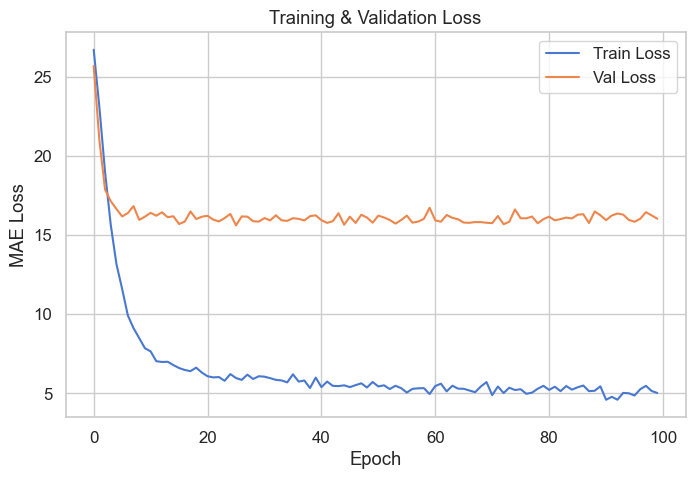

In [57]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [58]:
df


,Rank,Company,Stock Symbol,earnings TTM (USD) in Billion,Share price (USD),Company origin,log_earnings,earnings_ttm_winsor,share_price_winsor,log_earnings_ttm,log_share_price,price_bin
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.99221,Saudi Arabia,26.191174,1.184073e+09,7.992210,20.892226,2.196359,medium
1,2,Petrobras,PBR,1.573860e+11,17.01000,Brazil,25.781967,1.184073e+09,17.010000,20.892226,2.890927,medium
2,3,Berkshire Hathaway,BRK-B,1.251690e+11,406.14000,United States,25.552931,1.184073e+09,96.341625,20.892226,4.578227,high
3,4,Apple,AAPL,1.214160e+11,182.40000,United States,25.522489,1.184073e+09,96.341625,20.892226,4.578227,high
4,5,Microsoft,MSFT,1.052640e+11,409.34000,United States,25.379737,1.184073e+09,96.341625,20.892226,4.578227,high
...,...,...,...,...,...,...,...,...,...,...,...,...
8390,8391,SK Hynix,000660.KS,-9.950610e+09,132.14100,South Korea,23.020900,-7.206568e+08,96.341625,20.395674,4.578227,high
8391,8392,Lumen,LUMN,-1.081500e+10,1.30000,United States,23.104200,-7.206568e+08,1.300000,20.395674,0.832909,low
8392,8393,Walgreens Boots Alliance,WBA,-1.366400e+10,17.35000,United States,23.338030,-7.206568e+08,17.350000,20.395674,2.909630,medium
8393,8394,Veolia,VIE.PA,-1.438240e+10,32.27540,France,23.389271,-7.206568e+08,32.275400,20.395674,3.504818,high


In [59]:
df

,Rank,Company,Stock Symbol,earnings TTM (USD) in Billion,Share price (USD),Company origin,log_earnings,earnings_ttm_winsor,share_price_winsor,log_earnings_ttm,log_share_price,price_bin
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.99221,Saudi Arabia,26.191174,1.184073e+09,7.992210,20.892226,2.196359,medium
1,2,Petrobras,PBR,1.573860e+11,17.01000,Brazil,25.781967,1.184073e+09,17.010000,20.892226,2.890927,medium
2,3,Berkshire Hathaway,BRK-B,1.251690e+11,406.14000,United States,25.552931,1.184073e+09,96.341625,20.892226,4.578227,high
3,4,Apple,AAPL,1.214160e+11,182.40000,United States,25.522489,1.184073e+09,96.341625,20.892226,4.578227,high
4,5,Microsoft,MSFT,1.052640e+11,409.34000,United States,25.379737,1.184073e+09,96.341625,20.892226,4.578227,high
...,...,...,...,...,...,...,...,...,...,...,...,...
8390,8391,SK Hynix,000660.KS,-9.950610e+09,132.14100,South Korea,23.020900,-7.206568e+08,96.341625,20.395674,4.578227,high
8391,8392,Lumen,LUMN,-1.081500e+10,1.30000,United States,23.104200,-7.206568e+08,1.300000,20.395674,0.832909,low
8392,8393,Walgreens Boots Alliance,WBA,-1.366400e+10,17.35000,United States,23.338030,-7.206568e+08,17.350000,20.395674,2.909630,medium
8393,8394,Veolia,VIE.PA,-1.438240e+10,32.27540,France,23.389271,-7.206568e+08,32.275400,20.395674,3.504818,high


In [62]:
df['abs_earnings'] = df['earnings TTM (USD) in Billion'].abs()
df['is_loss'] = (df['earnings TTM (USD) in Billion'] < 0).astype(int)
df['log_earnings'] = np.log1p(df['earnings TTM (USD) in Billion'].clip(lower=0))
df['earnings_per_rank'] = df['earnings TTM (USD) in Billion'] / (df['Rank'] + 1)
df['is_high_rank'] = (df['Rank'] <= df['Rank'].quantile(0.1)).astype(int)
df['log_rank'] = np.log1p(df['Rank'])
df['company_name_length'] = df['Company'].apply(lambda x: len(str(x)))
df['symbol_length'] = df['Stock Symbol'].apply(lambda x: len(str(x)))
df['has_dot_in_symbol'] = df['Stock Symbol'].apply(lambda x: int('.' in str(x)))
df['company_name_word_count'] = df['Company'].apply(lambda x: len(str(x).split()))
df['rank_squared'] = df['Rank'] ** 2
df['rank_cubed'] = df['Rank'] ** 3
df['earnings_squared'] = df['earnings TTM (USD) in Billion'] ** 2
df['earnings_cubed'] = df['earnings TTM (USD) in Billion'] ** 3
df['abs_log_earnings'] = df['log_earnings'].abs()
df['rank_times_earnings'] = df['Rank'] * df['earnings TTM (USD) in Billion']
df['rank_div_earnings'] = df['Rank'] / (df['earnings TTM (USD) in Billion'].abs() + 1e-6)
df['country_name_length'] = df['Company origin'].apply(lambda x: len(str(x)))

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [64]:
# Target
target = 'share_price_winsor'

# Split data
X = df.drop(columns=[target, 'Share price (USD)'])  # drop target & raw price
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = ['Company origin']  # bisa tambahkan kolom kategorikal lain jika ada

# Column transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor)
])

# Transform
X_train_proc = pipeline.fit_transform(X_train)
X_val_proc = pipeline.transform(X_val)

# Build NN model (agak kompleks)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_proc.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_absolute_error')

C:\Users\I Putu Nanda Aditya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
df

,Rank,Company,Stock Symbol,earnings TTM (USD) in Billion,Share price (USD),Company origin,log_earnings,earnings_ttm_winsor,share_price_winsor,log_earnings_ttm,...,rank_div_price,country_name_length,country_is_upper,has_dot_in_symbol,rank_cubed,earnings_squared,earnings_cubed,abs_log_earnings,rank_times_earnings,rank_div_earnings
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.99221,Saudi Arabia,26.191174,1.184073e+09,7.992210,20.892226,...,0.125122,12,0,1,1,5.615194e+22,1.330599e+34,26.191174,2.369640e+11,4.220050e-12
1,2,Petrobras,PBR,1.573860e+11,17.01000,Brazil,25.781967,1.184073e+09,17.010000,20.892226,...,0.117578,6,0,0,8,2.477035e+22,3.898507e+33,25.781967,3.147720e+11,1.270761e-11
2,3,Berkshire Hathaway,BRK-B,1.251690e+11,406.14000,United States,25.552931,1.184073e+09,96.341625,20.892226,...,0.007387,13,0,0,27,1.566728e+22,1.961058e+33,25.552931,3.755070e+11,2.396760e-11
3,4,Apple,AAPL,1.214160e+11,182.40000,United States,25.522489,1.184073e+09,96.341625,20.892226,...,0.021930,13,0,0,64,1.474185e+22,1.789896e+33,25.522489,4.856640e+11,3.294459e-11
4,5,Microsoft,MSFT,1.052640e+11,409.34000,United States,25.379737,1.184073e+09,96.341625,20.892226,...,0.012215,13,0,0,125,1.108051e+22,1.166379e+33,25.379737,5.263200e+11,4.749962e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,8391,SK Hynix,000660.KS,-9.950610e+09,132.14100,South Korea,0.000000,-7.206568e+08,96.341625,20.395674,...,63.500351,11,0,1,590800920471,9.901464e+19,-9.852561e+29,0.000000,-8.349557e+13,8.432649e-07
8391,8392,Lumen,LUMN,-1.081500e+10,1.30000,United States,0.000000,-7.206568e+08,1.300000,20.395674,...,6455.379650,13,0,0,591012172288,1.169642e+20,-1.264968e+30,0.000000,-9.075948e+13,7.759593e-07
8392,8393,Walgreens Boots Alliance,WBA,-1.366400e+10,17.35000,United States,0.000000,-7.206568e+08,17.350000,20.395674,...,483.746370,13,0,0,591223474457,1.867049e+20,-2.551136e+30,0.000000,-1.146820e+14,6.142418e-07
8393,8394,Veolia,VIE.PA,-1.438240e+10,32.27540,France,0.000000,-7.206568e+08,32.275400,20.395674,...,260.074228,6,0,1,591434826984,2.068534e+20,-2.975049e+30,0.000000,-1.207259e+14,5.836300e-07


In [67]:
history = model.fit(X_train_proc, y_train,
                    validation_data=(X_val_proc, y_val),
                    epochs=100,
                    batch_size=32,
                    verbose=1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.1859 - val_loss: 5.2447
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2833 - val_loss: 5.2063
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3403 - val_loss: 5.3080
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2780 - val_loss: 5.1941
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2379 - val_loss: 4.7803
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2019 - val_loss: 4.7305
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2265 - val_loss: 4.4714
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1949 - val_loss: 5.0083
Epoch 9/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1413 - val_loss: 4.6384
Epoch 10/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1257 - val_loss: 5.1030
Epoch 11/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1212 - val_loss: 5.2531
Epoch 12/100
210/210 ━━━━━━━━━━━━━━━━━━━━

In [68]:
y_pred = model.predict(X_val_proc)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("\n=== NN Evaluation ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

=== NN Evaluation ===
MAE : 4.4626
RMSE: 7.4408
R²  : 0.9462
